# Module 3 - Churn Prediction

Dataset: https://www.kaggle.com/blastchar/telco-customer-churn


https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget $data -O data-week-3.csv

--2025-10-15 19:54:48--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  4.58MB/s    in 0.2s    

2025-10-15 19:54:48 (4.58 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv("data-week-3.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [11]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [12]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [13]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [14]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [16]:
df.totalcharges[488]

'_'

In [21]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [22]:
df[tc.isnull()][ ['customerid', 'totalcharges'] ]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [23]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [24]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [25]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

In [27]:
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Validation Framework

Using `scikit-learn` package

In [8]:
## Data processing from the previous step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data-week-3.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
## full train --> split another time for train vs validation to make 60/20/20 split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) 
df_full_train.shape, df_test.shape

((5634, 21), (1409, 21))

In [12]:
df_train, df_val = train_test_split(df_full_train, test_size=0.2/0.8, random_state=1)
df_train.shape, df_val.shape, df_test.shape

((4225, 21), (1409, 21), (1409, 21))

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [16]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 Exploratory Data Analysis

In [18]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [19]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int64

In [21]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [22]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [23]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [26]:
global_churn_rate = round(df_full_train.churn.mean(), 2)
global_churn_rate

np.float64(0.27)

In [28]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [30]:
## Numerical variables: tenure, monthly charges, total charges
numerical = ['tenure', 'monthlycharges', 'totalcharges']
np.setdiff1d(df_full_train.columns, numerical)

array(['churn', 'contract', 'customerid', 'dependents',
       'deviceprotection', 'gender', 'internetservice', 'multiplelines',
       'onlinebackup', 'onlinesecurity', 'paperlessbilling', 'partner',
       'paymentmethod', 'phoneservice', 'seniorcitizen',
       'streamingmovies', 'streamingtv', 'techsupport'], dtype=object)

In [31]:
categorical = ['contract', 'dependents',
       'deviceprotection', 'gender', 'internetservice', 'multiplelines',
       'onlinebackup', 'onlinesecurity', 'paperlessbilling', 'partner',
       'paymentmethod', 'phoneservice', 'seniorcitizen',
       'streamingmovies', 'streamingtv', 'techsupport']

In [33]:
df_full_train[categorical].nunique()

contract            3
dependents          2
deviceprotection    3
gender              2
internetservice     3
multiplelines       3
onlinebackup        3
onlinesecurity      3
paperlessbilling    2
partner             2
paymentmethod       4
phoneservice        2
seniorcitizen       2
streamingmovies     3
streamingtv         3
techsupport         3
dtype: int64

## 3.5 Feature Importance: Churn Rate and Risk Ratio

In [34]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [37]:
churn_female = df_full_train [ df_full_train.gender == 'female' ].churn.mean()
churn_male = df_full_train [ df_full_train.gender == 'male' ].churn.mean()
global_churn_rate, churn_female, churn_male

(np.float64(0.27),
 np.float64(0.27682403433476394),
 np.float64(0.2632135306553911))

In [38]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [40]:
churn_yes_partner = df_full_train [ df_full_train.partner == 'yes' ].churn.mean()
churn_no_partner = df_full_train [ df_full_train.partner == 'no' ].churn.mean()

global_churn_rate, churn_yes_partner, churn_no_partner

(np.float64(0.27),
 np.float64(0.20503330866025166),
 np.float64(0.3298090040927694))

`Gender` doesn't affect churn rate as much as `partner`.

Risk Ratio = group / global: > 1, more likely to churn, < 1 less likely to churn


Difference = global - group: > 0 less likely to churn, < 0 more likely to churn

In [43]:
churn_no_partner / global_churn_rate

np.float64(1.22151482997322)

In [44]:
churn_yes_partner / global_churn_rate

np.float64(0.7593826246675986)

In [45]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [48]:
df_gender = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_gender

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [50]:
df_gender['diff'] = df_gender['mean'] - global_churn_rate
df_gender['risk'] = df_gender['mean']/global_churn_rate
df_gender

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [51]:
from IPython.display import display

In [52]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379




gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


## 3.6 Feature Importance - Mutual Information

In [53]:
from sklearn.metrics import mutual_info_score

In [54]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [56]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [57]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

It is relative importance. The values are not bounded.

In [58]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [59]:
df_full_train[categorical].apply(mutual_info_churn_score)

contract            0.098320
dependents          0.012346
deviceprotection    0.043453
gender              0.000117
internetservice     0.055868
multiplelines       0.000857
onlinebackup        0.046923
onlinesecurity      0.063085
paperlessbilling    0.017589
partner             0.009968
paymentmethod       0.043210
phoneservice        0.000229
seniorcitizen       0.009410
streamingmovies     0.031581
streamingtv         0.031853
techsupport         0.061032
dtype: float64

In [61]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

**Q: Why compute mutual information for only categoricla variables?**

## 3.7 Feature Importance: Correlation

In [62]:
df_full_train.tenure.max()

np.int64(72)

In [63]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [65]:
df_full_train[df_full_train.tenure <= 2 ].churn.mean()

np.float64(0.5953420669577875)

In [66]:
df_full_train[df_full_train.tenure > 2 ].churn.mean()

np.float64(0.22478269658378816)

In [68]:
df_full_train[ (df_full_train.tenure > 2) & ( df_full_train.tenure < 12 ) ].churn.mean()

np.float64(0.4059003051881994)

In [70]:
df_full_train[ (df_full_train.monthlycharges <= 20 )].churn.mean()

np.float64(0.08795411089866156)

In [72]:
df_full_train[ (df_full_train.monthlycharges > 20 ) & (df_full_train.monthlycharges <= 50) ].churn.mean()

np.float64(0.18340943683409436)

In [74]:
df_full_train[ (df_full_train.monthlycharges > 50) ].churn.mean()

np.float64(0.32499341585462205)

## 3.8 One-hot Encoding

In [75]:
from sklearn.feature_extraction import DictVectorizer

In [76]:
df_train[ ['gender', 'contract'] ].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [77]:
df_train[ ['gender', 'contract'] ].iloc[:10].to_dict() ## each column to be one dict

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'}}

In [78]:
df_train[ ['gender', 'contract'] ].iloc[:10].to_dict(orient='records') ## turns each row into one dict

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [87]:
dicts = df_train[ ['gender', 'contract'] ].to_dict(orient='records')

In [84]:
dv = DictVectorizer()
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True


In [85]:
dv.transform(dicts) ## uses a method to deal with sparse matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20 stored elements and shape (10, 4)>

In [94]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [98]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [99]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.]], shape=(4225, 5))

In [100]:
dicts = df_train[ ['gender', 'contract', 'tenure'] ].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.get_feature_names_out()
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       ...,
       [ 1.,  0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  1.,  1.,  0., 27.],
       [ 1.,  0.,  0.,  1.,  0.,  9.]], shape=(4225, 6))

In [104]:
### actual transformation
train_dicts = df_train[ categorical + numerical ].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [102]:
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [107]:
X_train = dv.fit_transform(train_dicts)
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [108]:
X_train.shape

(4225, 45)

In [110]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## 3.9 Logistic Regression

In [19]:
## Data processing from the previous step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv("data-week-3.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)


In [3]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z) )

In [8]:
z = np.linspace(-7, 7, 101)
z

array([-7.0000000e+00, -6.8600000e+00, -6.7200000e+00, -6.5800000e+00,
       -6.4400000e+00, -6.3000000e+00, -6.1600000e+00, -6.0200000e+00,
       -5.8800000e+00, -5.7400000e+00, -5.6000000e+00, -5.4600000e+00,
       -5.3200000e+00, -5.1800000e+00, -5.0400000e+00, -4.9000000e+00,
       -4.7600000e+00, -4.6200000e+00, -4.4800000e+00, -4.3400000e+00,
       -4.2000000e+00, -4.0600000e+00, -3.9200000e+00, -3.7800000e+00,
       -3.6400000e+00, -3.5000000e+00, -3.3600000e+00, -3.2200000e+00,
       -3.0800000e+00, -2.9400000e+00, -2.8000000e+00, -2.6600000e+00,
       -2.5200000e+00, -2.3800000e+00, -2.2400000e+00, -2.1000000e+00,
       -1.9600000e+00, -1.8200000e+00, -1.6800000e+00, -1.5400000e+00,
       -1.4000000e+00, -1.2600000e+00, -1.1200000e+00, -9.8000000e-01,
       -8.4000000e-01, -7.0000000e-01, -5.6000000e-01, -4.2000000e-01,
       -2.8000000e-01, -1.4000000e-01,  8.8817842e-16,  1.4000000e-01,
        2.8000000e-01,  4.2000000e-01,  5.6000000e-01,  7.0000000e-01,
      

In [6]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

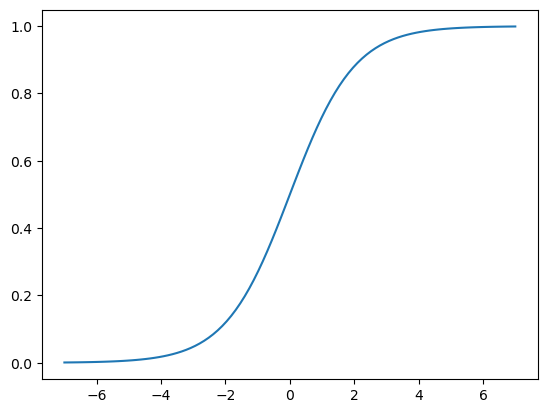

In [9]:
plt.plot(z, sigmoid(z))

In [10]:
sigmoid(-100)

np.float64(3.7200759760208356e-44)

In [12]:
sigmoid(1000)

np.float64(1.0)

In [14]:
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j]*w[j]

    return result

In [13]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j]*w[j]

    result = sigmoid(score)
    
    return result

## 3.10 Training Logistic Regression with Scikit-learn

In [22]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

categorical = ['contract', 'dependents',
       'deviceprotection', 'gender', 'internetservice', 'multiplelines',
       'onlinebackup', 'onlinesecurity', 'paperlessbilling', 'partner',
       'paymentmethod', 'phoneservice', 'seniorcitizen',
       'streamingmovies', 'streamingtv', 'techsupport']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) 
df_train, df_val = train_test_split(df_full_train, test_size=0.2/0.8, random_state=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

dv = DictVectorizer(sparse=False)
train_dicts = df_train[ categorical + numerical ].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[ categorical + numerical ].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

test_dicts = df_test[ categorical + numerical ].to_dict(orient='records')
X_test = dv.fit_transform(test_dicts)


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.062, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [29]:
## HARD predictions
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [32]:
## SOFT predictions
y_train_probPred = model.predict_proba(X_train)
y_train_probPred ## [negative prob, positive prob]

array([[0.90469885, 0.09530115],
       [0.32076841, 0.67923159],
       [0.36639229, 0.63360771],
       ...,
       [0.46756232, 0.53243768],
       [0.95735967, 0.04264033],
       [0.30132582, 0.69867418]], shape=(4225, 2))

In [34]:
y_train_prob = model.predict_proba(X_train)[:, 1]

In [36]:
y_val_prob = model.predict_proba(X_val)[:, 1]

In [39]:
churn_decision = (y_val_prob >= 0.5)

In [40]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [42]:
y_val == churn_decision.astype(int)

array([ True,  True,  True, ...,  True,  True,  True], shape=(1409,))

In [43]:
y_val == churn_decision

array([ True,  True,  True, ...,  True,  True,  True], shape=(1409,))

In [44]:
(y_val == churn_decision.astype(int)).mean()

np.float64(0.8034066713981547)

In [45]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_prob
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [47]:
df_pred

,probability,prediction,actual
0,0.009018,0,0
1,0.205034,0,0
2,0.212647,0,0
3,0.543019,1,1
4,0.214131,0,0
...,...,...,...
1404,0.314297,0,0
1405,0.039437,0,1
1406,0.136641,0,0
1407,0.799777,1,1


In [48]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [49]:
df_pred

,probability,prediction,actual,correct
0,0.009018,0,0,True
1,0.205034,0,0,True
2,0.212647,0,0,True
3,0.543019,1,1,True
4,0.214131,0,0,True
...,...,...,...,...
1404,0.314297,0,0,True
1405,0.039437,0,1,False
1406,0.136641,0,0,True
1407,0.799777,1,1,True


In [50]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

## 3.11 Model Interpretation

In [51]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [52]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.062, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [55]:
dict( zip(dv.get_feature_names_out(), model.coef_[0].round(3)) )

{'contract=month-to-month': np.float64(0.475),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.062),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [56]:
small = ['contract', 'tenure', 'monthlycharges']

In [59]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [60]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [61]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [62]:
X_train_small = dv_small.fit_transform(dicts_train_small)
X_val_small = dv_small.fit_transform(dicts_val_small)


In [64]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [65]:
model_small.intercept_

array([-2.4779576])

In [68]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [72]:
dict(zip (dv_small.get_feature_names_out(), w.round(2) ))

{'contract=month-to-month': np.float64(0.97),
 'contract=one_year': np.float64(-0.02),
 'contract=two_year': np.float64(-0.95),
 'monthlycharges': np.float64(0.03),
 'tenure': np.float64(-0.04)}

In [76]:
sigmoid( -2.47 + 0.97 + 50*0.027 + 5 * (-0.036) )

np.float64(0.41824062315816374)

In [77]:
 -2.47 + 0.97 + 50*0.027 + 5 * (-0.036) 

-0.3300000000000001

## 3.12 Using the model

In [79]:
dicts_full_train = df_full_train[categorical + numerical ].to_dict(orient="records")

In [84]:
dv=DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [85]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/opt/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [87]:
dicst_test = df_test[categorical + numerical ].to_dict(orient="records")
X_test = dv.fit_transform(dicst_test)

In [89]:
y_test_pred = model.predict_proba(X_test)[:, 1]

In [91]:
churn_decision = (y_test_pred >= 0.5)

In [92]:
(churn_decision == y_test).mean()

np.float64(0.8119233498935415)

In [97]:
customer = dicst_test[10]

In [99]:
x_customer = dv.transform([customer])

In [100]:
x_customer.shape

(1, 45)

In [101]:
model.predict_proba(x_customer)

array([[0.5029908, 0.4970092]])

In [102]:
y_test[0]

np.int64(0)